In [1]:
from data_handler import dataHandler

lfd = dataHandler('../data/Q1D.hdf5', ['p.txt', 'T.txt', 'M.txt'])

hfd = dataHandler('../data/SU2_fluid.hdf5', ['Pressure', 'Temperature', 'Mach', 'Heat_Flux'])


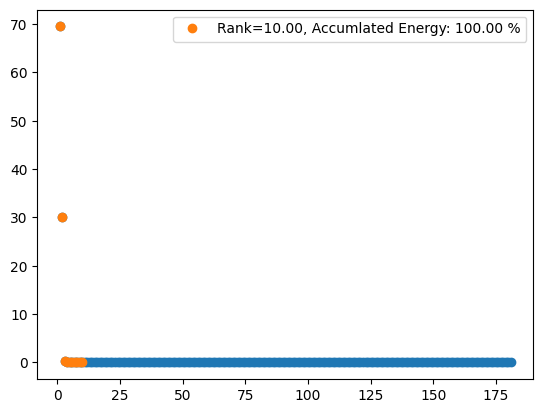

TypeError: only length-1 arrays can be converted to Python scalars

In [2]:
from train_nn import orderReduction

ntrain=145
nvalid=ntrain+18
ntest=nvalid+18

q1d_train = lfd.data[:,:ntrain]
su2_train = hfd.data[:,:ntrain]

q1d_validation = lfd.data[:,ntrain:nvalid]
su2_validation = hfd.data[:,ntrain:nvalid]

q1d_test = lfd.data[:,nvalid:ntest]
su2_test = hfd.data[:,nvalid:ntest]

rank = 10
(q1d_rom_train, q1d_rom_validation, q1d_rom_test), (su2_rom_train, su2_rom_validation, su2_rom_test), rank = orderReduction(low_fidelity_data=lfd.data,
                high_fidelity_data=hfd.data,
                rank=rank,
                data_split=[0.8,0.1,0.1])

In [ ]:
from data_handler import sliceDataAlongAxis

# q1d_train_L, q1d_validation_L, q1d_test_L = sliceDataAlongAxis(
#     q1d_rom.L, [0.8, 0.1, 0.1], 0)
# su2_train_L, su2_validation_L, su2_test_L = sliceDataAlongAxis(
#     su2_rom.L, [0.8, 0.1, 0.1], 0)

q1d_train_L = q1d_rom.compress(q1d_train)
q1d_test_L = q1d_rom.compress(q1d_test)
q1d_validation_L = q1d_rom.compress(q1d_validation)

su2_train_L = su2_rom.compress(su2_train)
su2_test_L = su2_rom.compress(su2_test) 
su2_validation_L = su2_rom.compress(su2_validation)


In [ ]:
q1d_rom.L

array([[10963294.15634127, -2235178.34368271,  1096739.19380668,
         2345083.85905732, -1019789.51938223,  -733393.97777916,
         -470803.2711345 ,   992495.25078192,    81949.19551961,
         4034635.69761539],
       [10958255.11244998, -2242248.60599246,  1096785.74901904,
         2345068.8556262 , -1019798.61146813,  -733393.97844215,
         -470803.47114183,   992495.00252931,    81949.19516593,
         4034635.69705609],
       [10936502.31648636, -2272628.6169636 ,  1097057.84221738,
         2345095.84402907, -1019755.03487773,  -733395.28008666,
         -470801.01941509,   992494.71494567,    81949.20213573,
         4034635.69964729],
       [10998292.53343106, -2185702.15357052,  1097038.93449214,
         2345126.59395434, -1019723.42489431,  -733394.33844805,
         -470802.85527797,   992494.58846304,    81949.19743181,
         4034635.6955079 ],
       [10998986.57902385, -2184713.97727365,  1097063.31569126,
         2345121.71440192, -1019725.2309934

In [ ]:
q1d_rom.compress(q1d_test)

array([[10963294.15634127, -2235178.34368271,  1096739.19380668,
         2345083.85905732, -1019789.51938223,  -733393.97777916,
         -470803.2711345 ,   992495.25078192,    81949.19551961,
         4034635.69761539],
       [10958255.11244998, -2242248.60599246,  1096785.74901904,
         2345068.8556262 , -1019798.61146813,  -733393.97844215,
         -470803.47114183,   992495.00252931,    81949.19516593,
         4034635.69705609],
       [10936502.31648636, -2272628.6169636 ,  1097057.84221738,
         2345095.84402907, -1019755.03487773,  -733395.28008666,
         -470801.01941509,   992494.71494567,    81949.20213573,
         4034635.69964729],
       [10998292.53343106, -2185702.15357052,  1097038.93449214,
         2345126.59395434, -1019723.42489431,  -733394.33844805,
         -470802.85527797,   992494.58846304,    81949.19743181,
         4034635.6955079 ],
       [10998986.57902385, -2184713.97727365,  1097063.31569126,
         2345121.71440192, -1019725.2309934

In [ ]:
q1d_rom.L.shape

(18, 10)

In [ ]:
q1d_rom.compress(q1d_train)

array([[10959738.66961821, -2240168.34395823,  1096770.91547011, ...,
          992495.08022346,    81949.19513299,  4034635.69721801],
       [10988200.0105534 , -2200039.51142006,  1096789.62634158, ...,
          992495.03484966,    81949.20063085,  4034635.69862992],
       [10970435.16167439, -2225136.8422974 ,  1096696.86855331, ...,
          992495.4687173 ,    81949.19783681,  4034635.69689814],
       ...,
       [10960154.23393819, -2239585.45577297,  1096766.91390502, ...,
          992495.10123374,    81949.19503554,  4034635.69809115],
       [10948691.85277101, -2255632.61532823,  1096896.12171825, ...,
          992494.54926531,    81949.19816948,  4034635.69741512],
       [11001995.47715747, -2180426.42406202,  1097181.73409833, ...,
          992494.58475022,    81949.19584459,  4034635.69896612]])

In [ ]:
q1d_rom.compress(q1d_test).shape

(18, 10)

In [ ]:
from train_nn import trainNN
from tensorflow.keras.models import load_model

num_inputs = rank
num_outputs = rank
num_layers = 10
num_neurons = rank*1



nn_model, history = trainNN(
    inputs_train=q1d_train_L, 
    outputs_train=su2_train_L, 
    inputs_validation=q1d_validation_L, 
    outputs_validation=su2_validation_L,
    layers=(num_inputs , num_outputs , num_layers , num_neurons)
)

nn_model.save('../data/trained_nn.keras')

nn_model = load_model('../data/trained_nn.keras')

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 18
'y' sizes: 145


<Axes: >

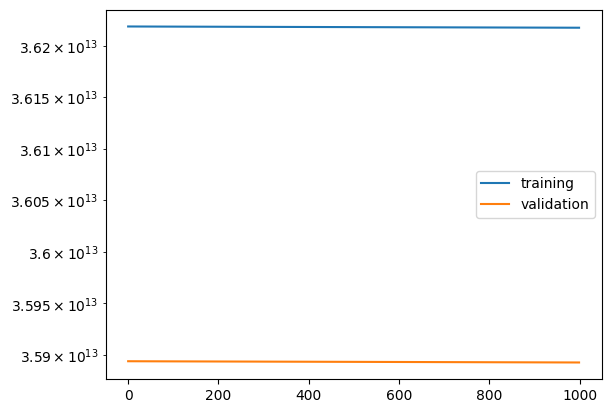

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.yscale('log')
x = np.arange(0, 1000)
sns.lineplot(x=x, y=history.history['loss'], label='training')
sns.lineplot(x=x, y=history.history['val_loss'], label='validation')

In [ ]:
q1d_test_L.shape

NameError: name 'q1d_test_L' is not defined

In [ ]:
q1d_train_L.shape

(117, 10)

In [ ]:
idx = 0
prediction = nn_model.predict(q1d_test_L[idx:idx+1])
reconstructed = su2_rom.reconstruct(prediction)
plt.plot(reconstructed[hfd.indexes['Heat_Flux'],idx])

NameError: name 'q1d_test_L' is not defined

In [ ]:
su2_test - reconstructed

array([[-7.53155268e+03, -6.38855268e+03, -1.81255268e+03, ...,
        -1.62025527e+04, -4.94655268e+03, -3.14755268e+03],
       [ 2.24743966e+02,  2.21843966e+02,  1.34243966e+02, ...,
         1.75343966e+02,  2.12043966e+02,  1.83943966e+02],
       [-7.53124480e+03, -6.38824480e+03, -1.81224480e+03, ...,
        -1.62022448e+04, -4.94624480e+03, -3.14724480e+03],
       ...,
       [ 2.84427709e+05,  2.47802009e+05,  8.32814094e+04, ...,
         5.60256909e+05,  2.01272309e+05,  1.38271909e+05],
       [ 2.86013509e+05,  2.49184209e+05,  8.37299095e+04, ...,
         5.63348509e+05,  2.02396909e+05,  1.39041209e+05],
       [ 3.24857099e+05,  2.82855099e+05,  9.47674987e+04, ...,
         6.44005299e+05,  2.29483999e+05,  1.57452399e+05]])

In [ ]:
reconstructed.shape

(208110, 1)

In [ ]:
from metrics import nrmse, nrse

nrmse(su2_test, reconstructed)

np.float64(0.7535100255658239)

In [ ]:
su2_test.shape

(208110, 18)

In [ ]:

#plt.plot(su2_test[hfd.indexes['Heat_Flux'],0])

IndexError: index 2 is out of bounds for axis 1 with size 1

In [ ]:
def average_error(variable_name):
    err = []
    for i in range(163, 181):
        input = q1d_rom.L[i, :][None, :]
        reconstructed = su2_rom.reconstruct(nn_model.predict(input))

        meshfile = hfd.meshfile[0].decode('utf-8')
        variable = reconstructed[hfd.indexes[variable_name]][:, 0]

        raw_data = hfd.data[:, i][hfd.indexes[variable_name]]

        err.append(nrmse(raw_data, variable))

    return np.abs(np.mean(np.array(err)))